# Handwritten Character Recognition

**Optical Character Recognition (OCR) is the process of converting images of handwritten or printed text into machine-encoded text. This project demonstrates the implementation of Optical Character Recognition (OCR) using three different machine learning techniques: K-Nearest Neighbors (KNN), Artificial Neural Networks (ANN), and Convolutional Neural Networks (CNN). The objective is to compare the performance and accuracy of these models in recognizing handwritten characters.** 

In [1]:
# Importing Libraries
from datasets import load_dataset
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import  layers, models 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
import pickle
from sklearn.preprocessing import OneHotEncoder 
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from sklearn.neural_network import MLPClassifier
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import backend as K
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Activation, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
import itertools

## Dataset

The **EMNIST** (Extended Modified National Institute of Standards and Technology) dataset is an extension of the MNIST dataset, containing handwritten character images. It comprises handwritten characters in various forms, such as **uppercase letters, lowercase letters, digits, and even some symbols.**

The dataset is organized into several different splits or subsets, each representing a different classification task:

* **ByClass:** Contains letters and digits. There are 814,255 characters in this dataset split.
* **ByMerge:** Similar to ByClass but with merged classes (e.g., uppercase 'C' and lowercase 'c' are considered the same). It contains 814,255 characters.
* **Balanced:** Contains a balanced set of characters for each class. There are 131,600 characters in this dataset split.
* **Letters:** Contains only letters. It consists of 145,600 characters.
* **Digits:** Contains only digits. It consists of 280,000 characters.

**Here we have used the balanced emnist dataset**

In [2]:
# Importing the dataset
train_set = load_dataset("Shyam-Mashru/Minist-Dataset", data_files="train_dataset.csv")
test_set = load_dataset("Shyam-Mashru/Minist-Dataset", data_files="test_dataset.csv")
train_set = train_set["train"].to_pandas()
test_set = test_set["train"].to_pandas()

## Preprocessing

<Axes: ylabel='count'>

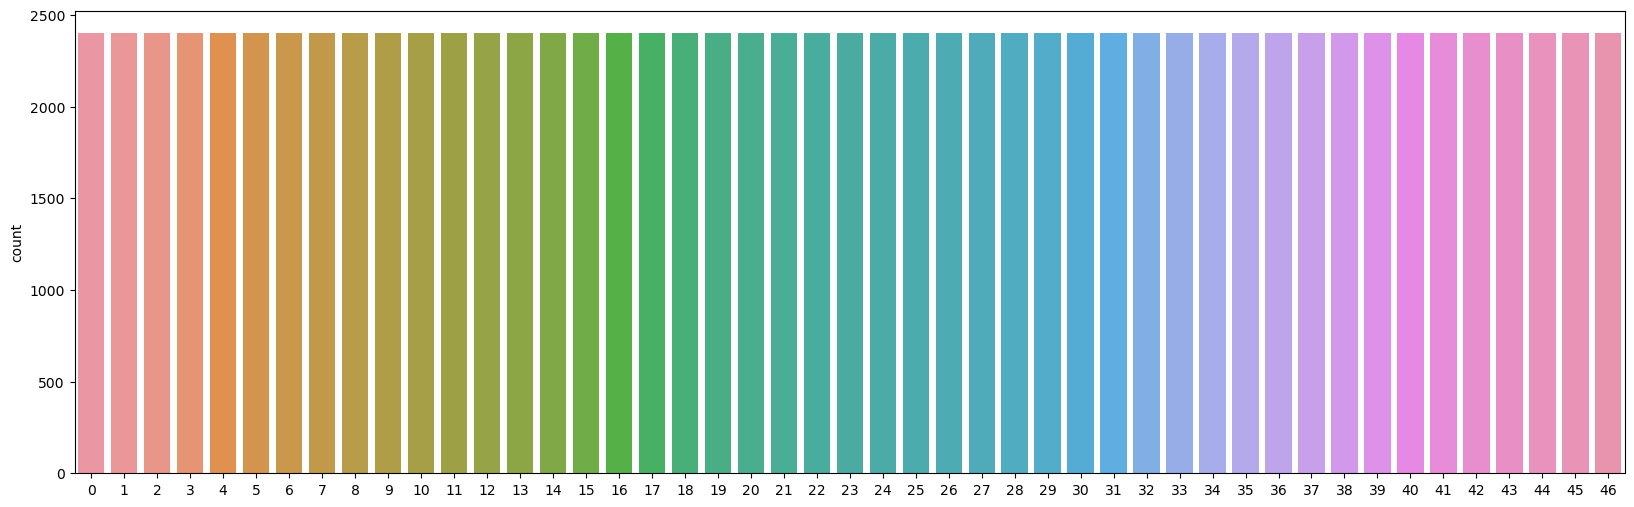

In [3]:
labels1 = train_set['45'].values

plt.figure(figsize=(20,6))
plt.plot()
sns.countplot(x=labels1)

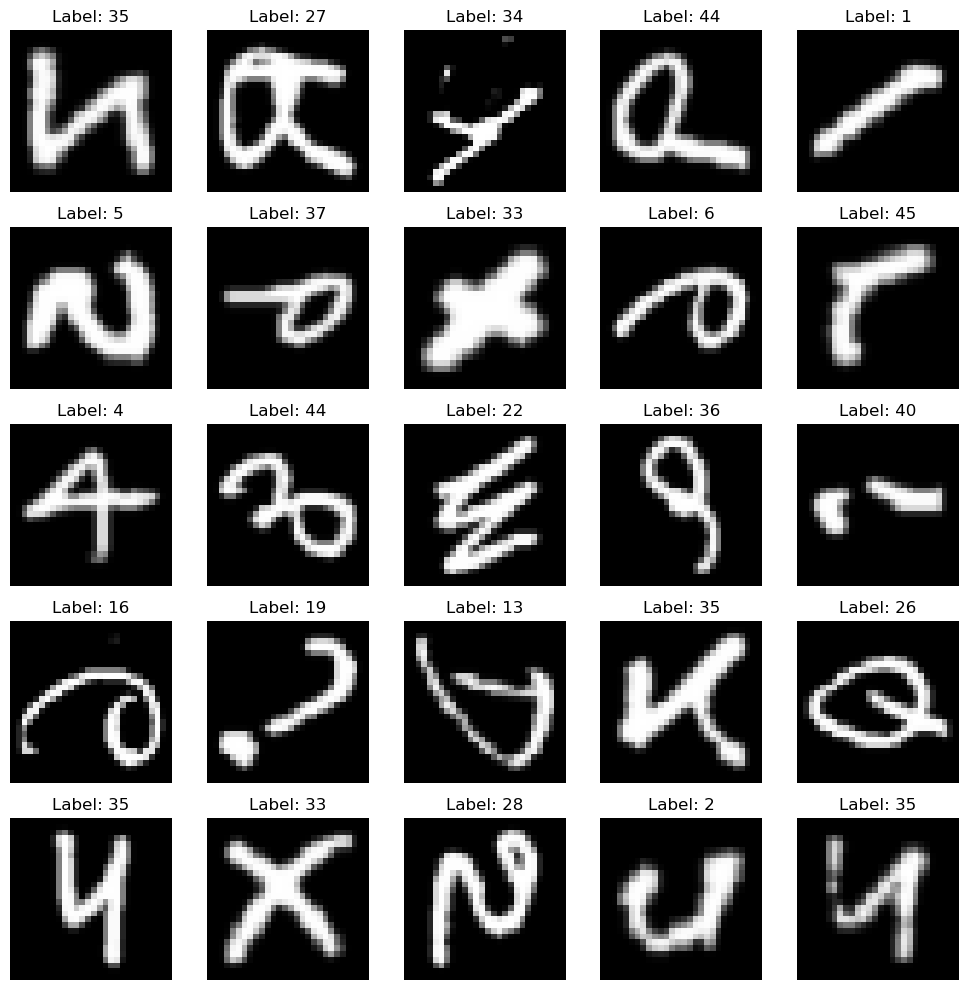

In [4]:
num_samples = 25 
selected_data = train_set.sample(n=num_samples)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    image = selected_data.iloc[i, 1:].values.reshape(28, 28)
    label = selected_data.iloc[i, 0]

    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Splitting the dataset
Y_train = np.array(train_set.iloc[:,0].values)
X_train = np.array(train_set.iloc[:,1:].values)
#test_set
Y_test = np.array(test_set.iloc[:,0].values)
X_test = np.array(test_set.iloc[:,1:].values)
print(Y_train.shape)
print(X_train.shape)

X_train= X_train/255
X_test= X_test/255

(112799,)
(112799, 784)


In [6]:
labels1 = train_set["45"].values
labels=set(labels1)
labels=list(labels)
labels = [str(label) for label in labels]
print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46']


### Model 1 : KNN (K-Nearest Neighbours)

In [7]:
Y_train=Y_train.ravel()
Y_test=Y_test.ravel()

In [8]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
x_train=X_train
y_train=Y_train
x_test=X_test

X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

# One-hot encode the target labels for categorical classification.
Y_train = tf.keras.utils.to_categorical(Y_train, 47)  # 37 classes (26 letters + 1 for 'none')
Y_test = tf.keras.utils.to_categorical(Y_test, 47)
print(x_test.shape)

(18799, 784)


## Training Phase (KNN)

In [9]:
knn = KNeighborsClassifier(n_neighbors=7,
                           weights='distance',     #{distance, uniform}
                           algorithm = 'auto'
                           )  

In [10]:
# Apply PCA for feature extraction.
t0 = datetime.datetime.now()

pca = PCA(n_components=40)
pca.fit(x_train, y_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape)
print(y_train.shape)
to = datetime.datetime.now() - t0
print('PCA runtime:', to)
# execute the 10-fold cross validation exercise in training dataset.
t0 = datetime.datetime.now()

CV_accuracy_score = cross_val_score(knn, x_train_pca, y_train, cv=10, scoring = 'accuracy')
CV_precision_score = cross_val_score(knn,x_train_pca, y_train, cv=10, scoring = 'precision_macro')
CV_recall_score = cross_val_score(knn, x_train_pca, y_train, cv=10, scoring = 'recall_macro')
CV_f1_score = cross_val_score(knn, x_train_pca, y_train, cv=10, scoring = 'f1_macro')
average_accuracy = np.mean(CV_accuracy_score)
average_precision = np.mean(CV_precision_score)
average_recall = np.mean(CV_recall_score)
average_f1 = np.mean(CV_f1_score)

to = datetime.datetime.now() - t0
print('KNN runtime:', to)

(112799, 40)
(112799,)
PCA runtime: 0:00:00.610581
KNN runtime: 0:01:36.808698


In [11]:
print('average_accuracy:', average_accuracy)
print('average_precision:', average_precision)
print('average_recall:', average_recall)
print('average_f1:', average_f1)

average_accuracy: 0.8111950777475746
average_precision: 0.814254315091335
average_recall: 0.8111963263004837
average_f1: 0.8106255810755496


## Testing Phase (KNN)

In [12]:
knn = knn.fit(x_train_pca, y_train)
pickle.dump(knn,open('model_knn.pkl','wb'))
knn_pkl = pickle.load(open('model_knn.pkl','rb'))
knn_pred=knn_pkl.predict(x_test_pca)
from sklearn.preprocessing import label_binarize

# Assuming knn_pred is a 1D array of predicted labels
knn_pred_multi_label = label_binarize(knn_pred, classes=range(47))

knn_accuracy = accuracy_score(Y_test, knn_pred_multi_label)*100

print("Accuracy for KNN {} %".format (knn_accuracy))
print(classification_report(Y_test, knn_pred_multi_label, target_names=labels))

Accuracy for KNN 81.15857226448216 %
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       400
           1       0.49      0.59      0.53       400
           2       0.90      0.76      0.82       400
           3       0.94      0.95      0.95       400
           4       0.88      0.84      0.86       400
           5       0.87      0.75      0.81       400
           6       0.85      0.91      0.88       400
           7       0.92      0.98      0.95       400
           8       0.83      0.82      0.83       400
           9       0.60      0.77      0.67       400
          10       0.90      0.88      0.89       400
          11       0.88      0.81      0.84       400
          12       0.88      0.92      0.90       400
          13       0.87      0.81      0.83       400
          14       0.95      0.91      0.93       400
          15       0.58      0.54      0.56       400
          16       0.91      0.83      0.87 

## Dataset

The Digit-Character Dataset typically refers to a dataset that contains both handwritten **digits (0-9)** and **characters (A-Z, a-z)**. It is used for tasks like **optical character recognition (OCR)**, where the goal is to classify handwritten or printed digits and characters.

**Here the dataset used is **data-char** dataset**

In [13]:
df = load_dataset("Shyam-Mashru/Minist-Dataset", data_files="dataset.csv")
df = df["train"].to_pandas()

In [14]:
X = df.drop('class',axis = 1)
y = df['class']

## Preprocessing

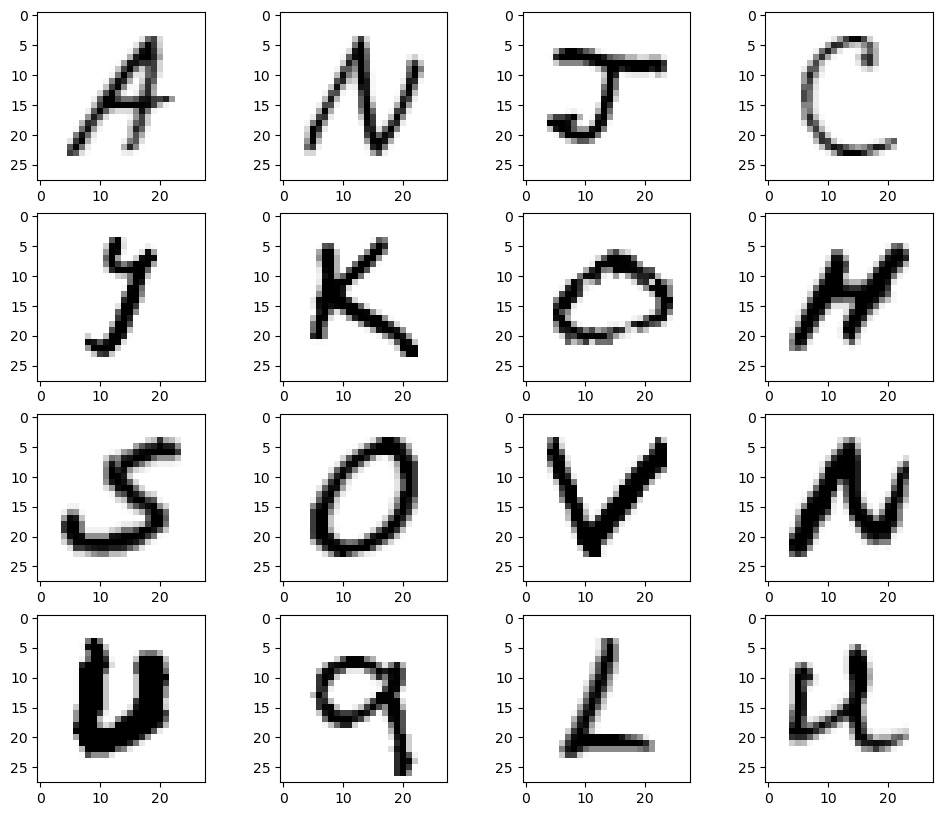

In [15]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

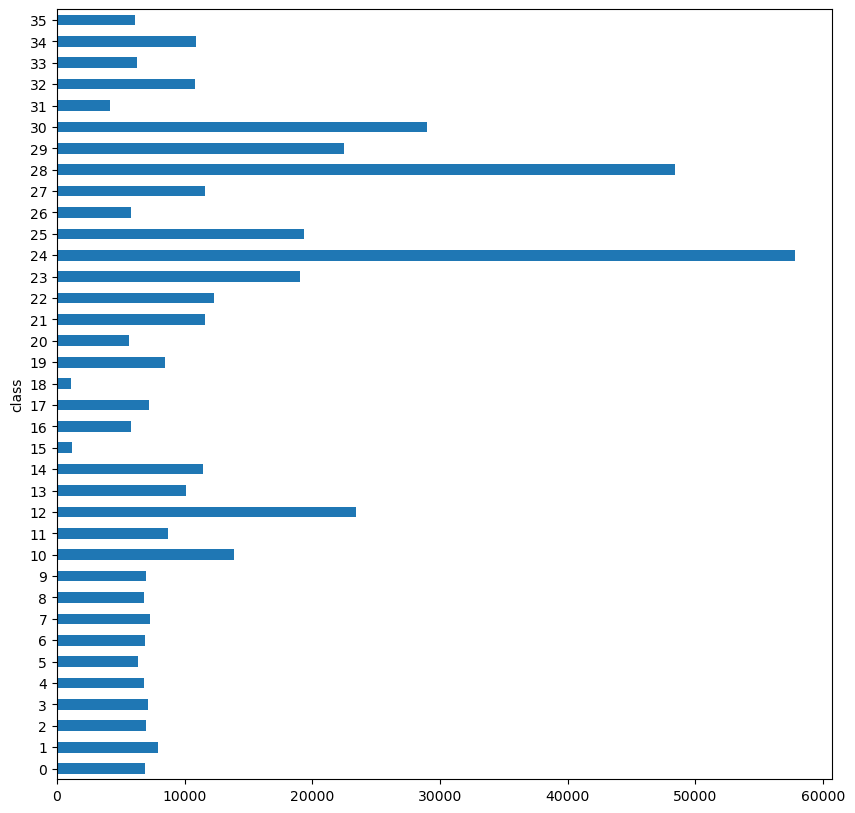

In [16]:
label_size = df.groupby('class').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

In [17]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data)

data_test = data[0:12450].T
Y_test = data_test[n-1]
X_test = data_test[0:n-1]
X_test = X_test / 255.

data_train = data[12450:m].T
Y_train = data_train[n-1]
X_train = data_train[0:n-1]
X_train = X_train / 255.
_,m_train = X_train.shape

print(_, m_train)

784 430000


In [18]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(784, 430000)
(430000,)
(784, 12450)
(12450,)


In [19]:
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)
print(Y_train)
print(Y_test)

[19 24 21 ...  3 25 30]
[14 18 27 ... 29  6 26]


In [20]:
classes = []

for i in range(36):
    
    if i < 10:
        classes.append(chr(i+48))
    else:
        classes.append(chr(i-10+65))
        
classes

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

### Model 2 : ANN (Artificial Neural Network)

In [21]:
X_train = X_train.T
X_train.shape

(430000, 784)

In [22]:
Y_train.shape

(430000,)

In [23]:
X_test = X_test.T
X_test.shape

(12450, 784)

In [24]:
Y_test.shape

(12450,)

In [25]:
Y_train_encoded = to_categorical(Y_train, num_classes=36)
Y_test_encoded = to_categorical(Y_test, num_classes=36)

## Training Phase (ANN)

In [26]:
ann = Sequential([
    Dense(784, activation='relu', input_shape=(784,)),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')
])

C:\Users\Shyam Mashru\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,157,940 (4.42 MB)

 Trainable params: 1,157,940 (4.42 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
ann_fit=ann.fit(X_train, Y_train_encoded, epochs=10, validation_data=(X_test,Y_test_encoded))

Epoch 1/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 95s 7ms/step - accuracy: 0.7706 - loss: 0.8367 - val_accuracy: 0.9383 - val_loss: 0.2210
Epoch 2/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 108s 8ms/step - accuracy: 0.8860 - loss: 0.4349 - val_accuracy: 0.9451 - val_loss: 0.2018
Epoch 3/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 96s 7ms/step - accuracy: 0.8970 - loss: 0.4133 - val_accuracy: 0.9523 - val_loss: 0.1907
Epoch 4/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 94s 7ms/step - accuracy: 0.9013 - loss: 0.4053 - val_accuracy: 0.9515 - val_loss: 0.1973
Epoch 5/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 96s 7ms/step - accuracy: 0.9028 - loss: 0.4084 - val_accuracy: 0.9512 - val_loss: 0.1943
Epoch 6/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 97s 7ms/step - accuracy: 0.9050 - loss: 0.4047 - val_accuracy: 0.9559 - val_loss: 0.1805
Epoch 7/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 98s 7ms/step - accuracy: 0.9086 - loss: 0.3942 - val_accuracy: 0.9534 - val_loss: 0.1857
Epoch 8/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 100s 7ms/step - accuracy

In [30]:
ann.save('model_ann.h5')

In [31]:
history = ann_fit.history

training_loss = history['loss']
validation_loss = history['val_loss']

training_accuracy = history['accuracy']
validation_accuracy = history['val_accuracy']


print("Training Loss:", training_loss)
print("Validation Loss:", validation_loss)
print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)

Training Loss: [0.5862749814987183, 0.42965152859687805, 0.4132891595363617, 0.40449073910713196, 0.4058374762535095, 0.4054245054721832, 0.4009973406791687, 0.400175005197525, 0.40749049186706543, 0.4082943797111511]
Validation Loss: [0.2209850549697876, 0.20182384550571442, 0.19066621363162994, 0.19729562103748322, 0.19425120949745178, 0.1805197149515152, 0.1856699436903, 0.18414385616779327, 0.17955487966537476, 0.187019482254982]
Training Accuracy: [0.8401860594749451, 0.8886511921882629, 0.8974767327308655, 0.9021418690681458, 0.9035372138023376, 0.90550696849823, 0.9080069661140442, 0.9088837504386902, 0.9095674157142639, 0.9105976819992065]
Validation Accuracy: [0.9383132457733154, 0.9450602531433105, 0.9522891640663147, 0.9514859318733215, 0.9512449502944946, 0.9559035897254944, 0.9534136652946472, 0.9511646628379822, 0.9536546468734741, 0.9524497985839844]


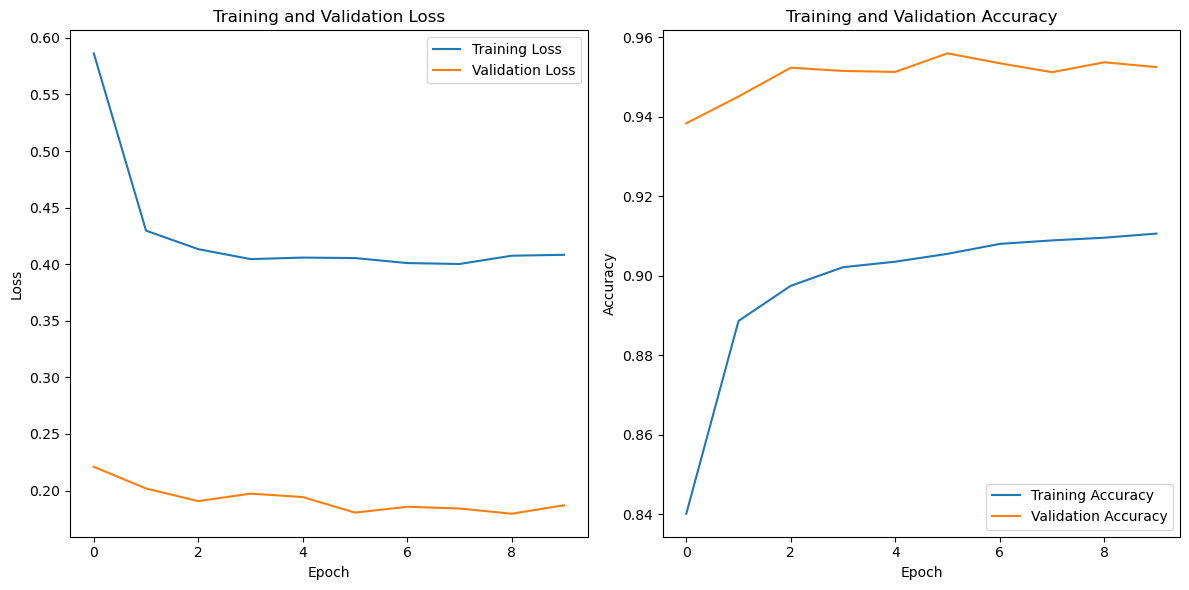

In [32]:
# Plotting the Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Testing Phase (ANN)

In [33]:
predictions = ann.predict(X_test)
predictions

390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.85179380e-17],
       [0.00000000e+00, 1.66553204e-20, 3.01898871e-33, ...,
        0.00000000e+00, 5.61763721e-36, 1.16993885e-16],
       [2.75269254e-34, 1.09094859e-16, 5.43581073e-08, ...,
        1.02941340e-06, 3.57604120e-11, 3.96887799e-07],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.95358601e-22, 1.06248374e-35],
       [1.12248654e-32, 0.00000000e+00, 5.55255814e-33, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.79959214e-09, 5.14239989e-19, 2.90909725e-07, ...,
        6.11884344e-30, 3.92999498e-17, 9.41976440e-25]], dtype=float32)

In [34]:
Y_test_pred = np.argmax(predictions, axis=1)

In [35]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [36]:
ann_accuracy = get_accuracy(Y_test_pred, Y_test)
ann_accuracy

[14 18 27 ... 29  6 26] [14 18 27 ... 29  6 26]


0.9524497991967872

## Evaluation (ANN)

In [37]:
cls_report = classification_report(Y_test, Y_test_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.99      0.53      0.69       187
           1       0.95      0.98      0.97       226
           2       0.94      0.94      0.94       215
           3       1.00      0.91      0.95       216
           4       0.97      0.92      0.94       181
           5       0.99      0.85      0.92       186
           6       0.99      0.99      0.99       194
           7       0.97      0.97      0.97       207
           8       0.92      0.91      0.92       186
           9       0.97      0.96      0.97       208
          10       0.93      0.99      0.96       414
          11       0.82      0.95      0.88       238
          12       0.98      0.98      0.98       676
          13       0.96      0.87      0.91       293
          14       0.98      0.90      0.94       330
          15       0.90      0.97      0.93        36
          16       0.96      0.92      0.94       157
          17       0.97    

In [38]:
cm = confusion_matrix(y_true = Y_test, y_pred = Y_test_pred)
cm

array([[ 99,   0,   0, ...,   0,   0,   0],
       [  0, 222,   0, ...,   0,   0,   0],
       [  0,   1, 202, ...,   0,   0,   2],
       ...,
       [  0,   0,   0, ..., 171,   3,   0],
       [  0,   1,   0, ...,   0, 302,   0],
       [  0,   0,   8, ...,   0,   0, 167]], dtype=int64)

In [39]:
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    
    plt.figure(figsize=(23,23))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


### Model 3 : CNN (Convolution Neural Network) using Keras

In [40]:
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

## Training Phase (CNN)

In [41]:
cnn = Sequential([
    
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    
    Conv2D(64, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    
    Flatten(),
    
    Dense(128, activation='relu'),
#     Dropout(0.5),
    Dense(64, activation='relu'),
#     Dropout(0.5),
    Dense(36, activation='softmax')
])

C:\Users\Shyam Mashru\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 36)                  │           2,340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431,332 (1.65 MB)

 Trainable params: 431,140 (1.64 MB)

 Non-trainable params: 192 (768.00 B)

In [43]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
cnn_fit=cnn.fit(X_train_reshaped, Y_train_encoded, epochs=10, validation_data=(X_test_reshaped,Y_test_encoded))

Epoch 1/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 189s 14ms/step - accuracy: 0.9141 - loss: 0.3109 - val_accuracy: 0.9749 - val_loss: 0.0852
Epoch 2/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 195s 14ms/step - accuracy: 0.9756 - loss: 0.0826 - val_accuracy: 0.9792 - val_loss: 0.0693
Epoch 3/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 190s 14ms/step - accuracy: 0.9822 - loss: 0.0586 - val_accuracy: 0.9799 - val_loss: 0.0675
Epoch 4/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 191s 14ms/step - accuracy: 0.9861 - loss: 0.0451 - val_accuracy: 0.9831 - val_loss: 0.0587
Epoch 5/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 191s 14ms/step - accuracy: 0.9884 - loss: 0.0361 - val_accuracy: 0.9861 - val_loss: 0.0489
Epoch 6/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 192s 14ms/step - accuracy: 0.9905 - loss: 0.0300 - val_accuracy: 0.9869 - val_loss: 0.0488
Epoch 7/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 192s 14ms/step - accuracy: 0.9911 - loss: 0.0274 - val_accuracy: 0.9871 - val_loss: 0.0460
Epoch 8/10
13438/13438 ━━━━━━━━━━━━━━━━━━━━ 197s 15ms/s

In [45]:
cnn.save('model_cnn.h5')

In [46]:
history = cnn_fit.history

training_loss = history['loss']
validation_loss = history['val_loss']

training_accuracy = history['accuracy']
validation_accuracy = history['val_accuracy']


print("Training Loss:", training_loss)
print("Validation Loss:", validation_loss)
print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)

Training Loss: [0.16884076595306396, 0.07763277739286423, 0.057744208723306656, 0.0456269346177578, 0.03779870644211769, 0.031422168016433716, 0.028198281303048134, 0.025518305599689484, 0.022457076236605644, 0.020775465294718742]
Validation Loss: [0.08518609404563904, 0.06929774582386017, 0.06748919934034348, 0.058681752532720566, 0.04885261878371239, 0.048777155578136444, 0.045953843742609024, 0.05071564018726349, 0.03871545195579529, 0.04719533771276474]
Training Accuracy: [0.951583743095398, 0.977144181728363, 0.98238605260849, 0.9860720634460449, 0.9882000088691711, 0.9901255965232849, 0.9909930229187012, 0.9918069839477539, 0.9929883480072021, 0.99335116147995]
Validation Accuracy: [0.9748594164848328, 0.9791967868804932, 0.9799196720123291, 0.983132541179657, 0.986104428768158, 0.9869076013565063, 0.9870682954788208, 0.9873092174530029, 0.9897992014884949, 0.9880321025848389]


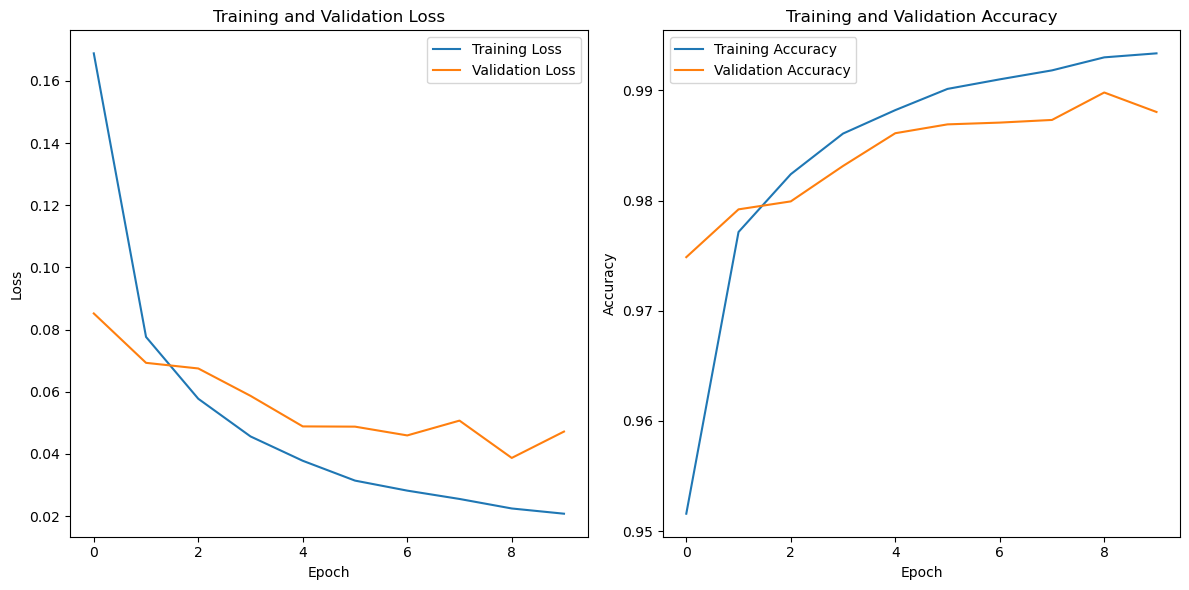

In [47]:
# Plotting the Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Testing Phase (CNN)

In [48]:
predictions = cnn.predict(X_test_reshaped)
predictions

390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[3.4118846e-37, 1.3947923e-36, 4.5887813e-35, ..., 3.6532938e-27,
        3.2102256e-20, 2.1811862e-23],
       [3.4470273e-35, 3.3841855e-21, 1.6941391e-25, ..., 6.7203197e-16,
        4.9967505e-22, 2.0682044e-15],
       [4.6020340e-35, 2.6404400e-34, 6.7829979e-19, ..., 4.6582684e-21,
        1.5366137e-37, 3.2997576e-20],
       ...,
       [0.0000000e+00, 3.0439307e-34, 0.0000000e+00, ..., 2.1376080e-34,
        4.2684853e-24, 1.2972512e-28],
       [4.7252186e-15, 1.3006119e-26, 2.2722316e-23, ..., 0.0000000e+00,
        7.6728871e-38, 0.0000000e+00],
       [5.9140678e-11, 4.6949895e-17, 3.8919872e-09, ..., 1.4940631e-17,
        1.2419086e-12, 6.0907416e-15]], dtype=float32)

In [49]:
Y_test_pred = np.argmax(predictions, axis=1)

In [50]:
cnn_accuracy = get_accuracy(Y_test_pred, Y_test)
cnn_accuracy

[14 18 27 ... 29  6 26] [14 18 27 ... 29  6 26]


0.9880321285140562

## Evaluation

In [51]:
cls_report = classification_report(Y_test, Y_test_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       187
           1       0.98      1.00      0.99       226
           2       0.97      0.98      0.98       215
           3       1.00      0.98      0.99       216
           4       0.98      0.99      0.99       181
           5       0.93      0.97      0.95       186
           6       0.98      0.99      0.99       194
           7       1.00      0.99      0.99       207
           8       0.99      0.97      0.98       186
           9       0.99      1.00      0.99       208
          10       1.00      0.99      0.99       414
          11       1.00      0.99      0.99       238
          12       1.00      0.99      0.99       676
          13       0.96      0.99      0.97       293
          14       0.98      0.99      0.99       330
          15       1.00      1.00      1.00        36
          16       0.98      0.99      0.98       157
          17       0.98    

In [52]:
cm = confusion_matrix(y_true = Y_test, y_pred = Y_test_pred)
cm


array([[165,   0,   0, ...,   0,   0,   0],
       [  0, 225,   0, ...,   0,   0,   0],
       [  1,   2, 211, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 187,   0,   0],
       [  0,   1,   0, ...,   0, 308,   0],
       [  0,   0,   1, ...,   0,   0, 183]], dtype=int64)

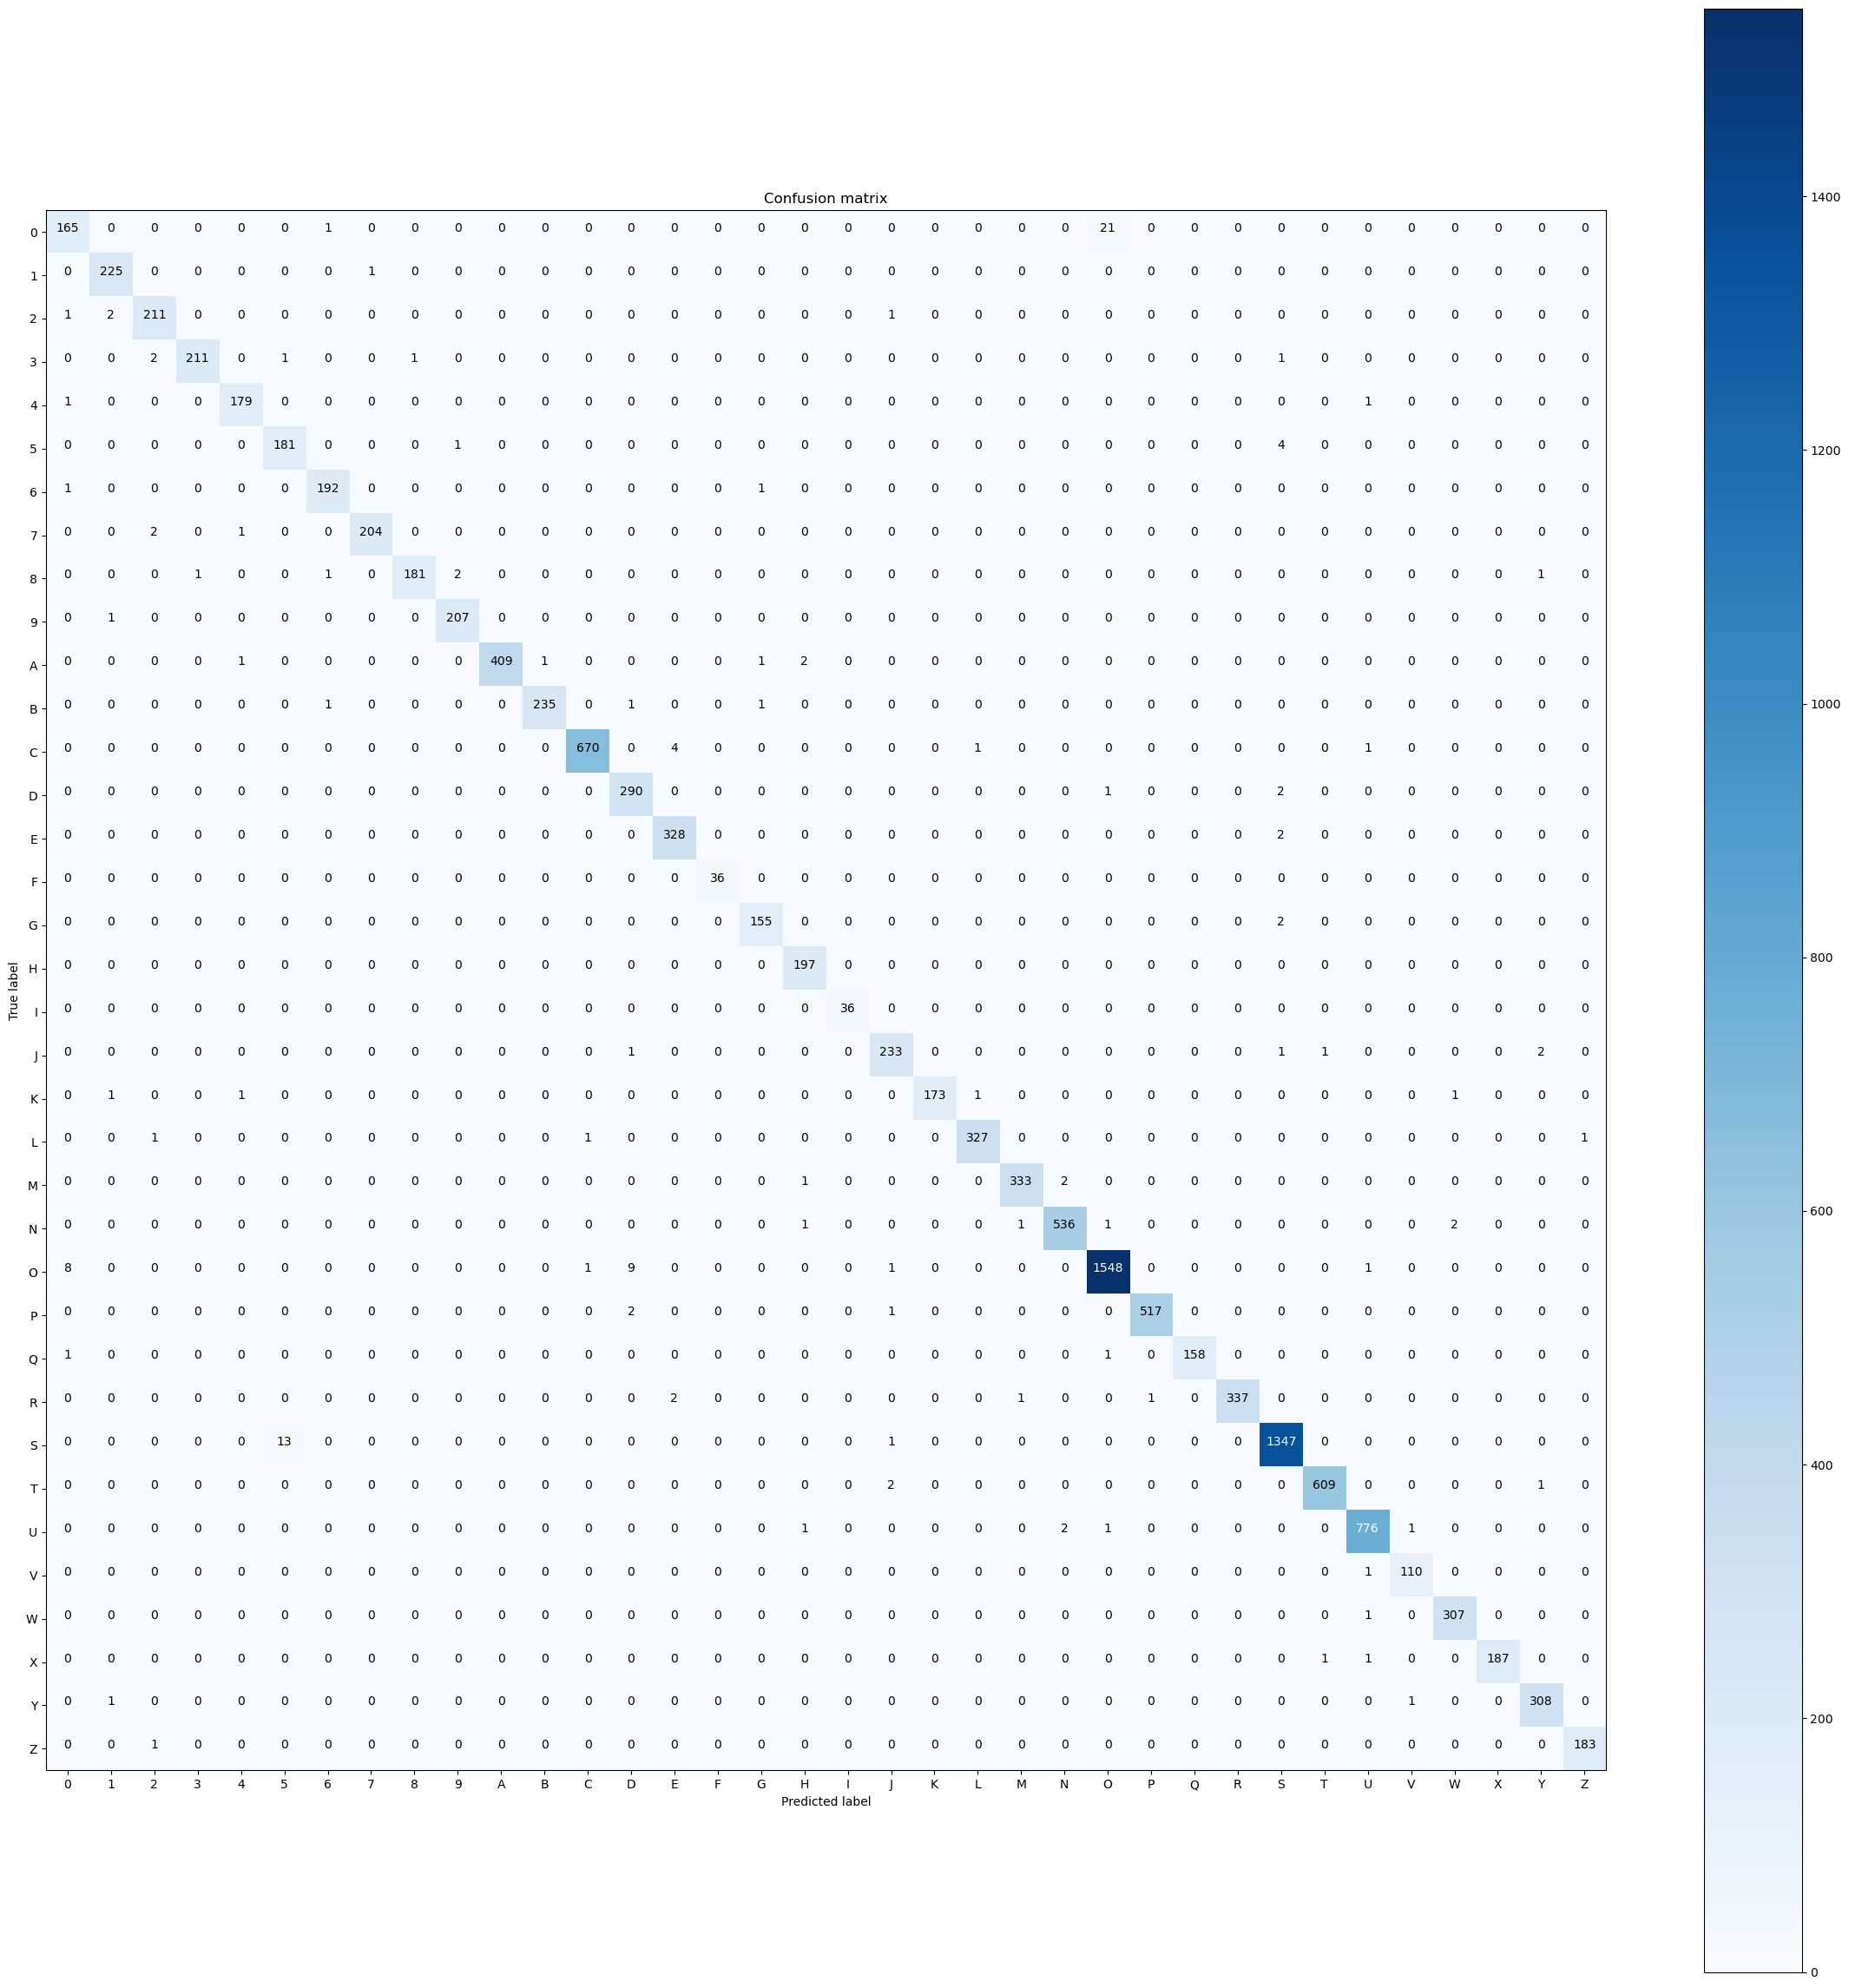

In [53]:
plot_confusion_matrix(cm, classes)

## Overall Evaluation

In [54]:
accuracies = [knn_accuracy, ann_accuracy*100, cnn_accuracy*100]
accuracies

[81.15857226448216, 95.24497991967871, 98.80321285140562]

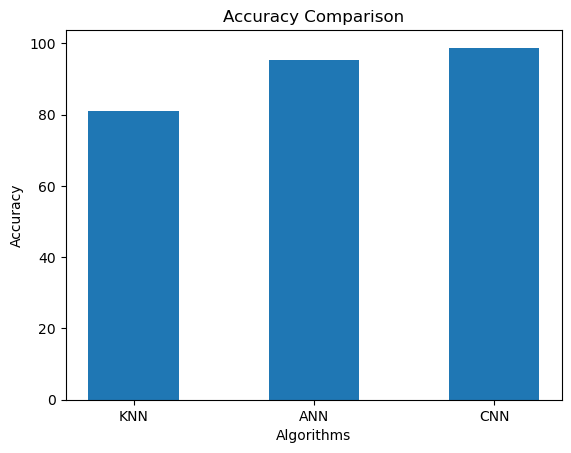

In [55]:
import matplotlib.pyplot as plt
label = ["KNN", "ANN", "CNN"]

plt.bar(label, accuracies, width = 0.5)
plt.title("Accuracy Comparison")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

## Result

* **KNN : Accuracy - 81%**

* **ANN : Accuracy - 95%**

* **CNN : Accuracy - 99%**

## Conclusion

* **CNN is better than ANN and KNN for digit recognition (OCR)**